In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plot_analysis_result as plot
import importlib
importlib.reload(plot)
input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant'
output_folder = './result_plots'
os.makedirs(output_folder, exist_ok=True)
import importlib
importlib.reload(plot)
result_df = plot.read_all_result_files(input_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/design_matrix.csv'

## Plot1: Compare the performance of different solvers, across different true_h
- x_axis: true_h
- y_axis: wMSE
- hue: bins
- subplot: solver
- plot_type: boxplot


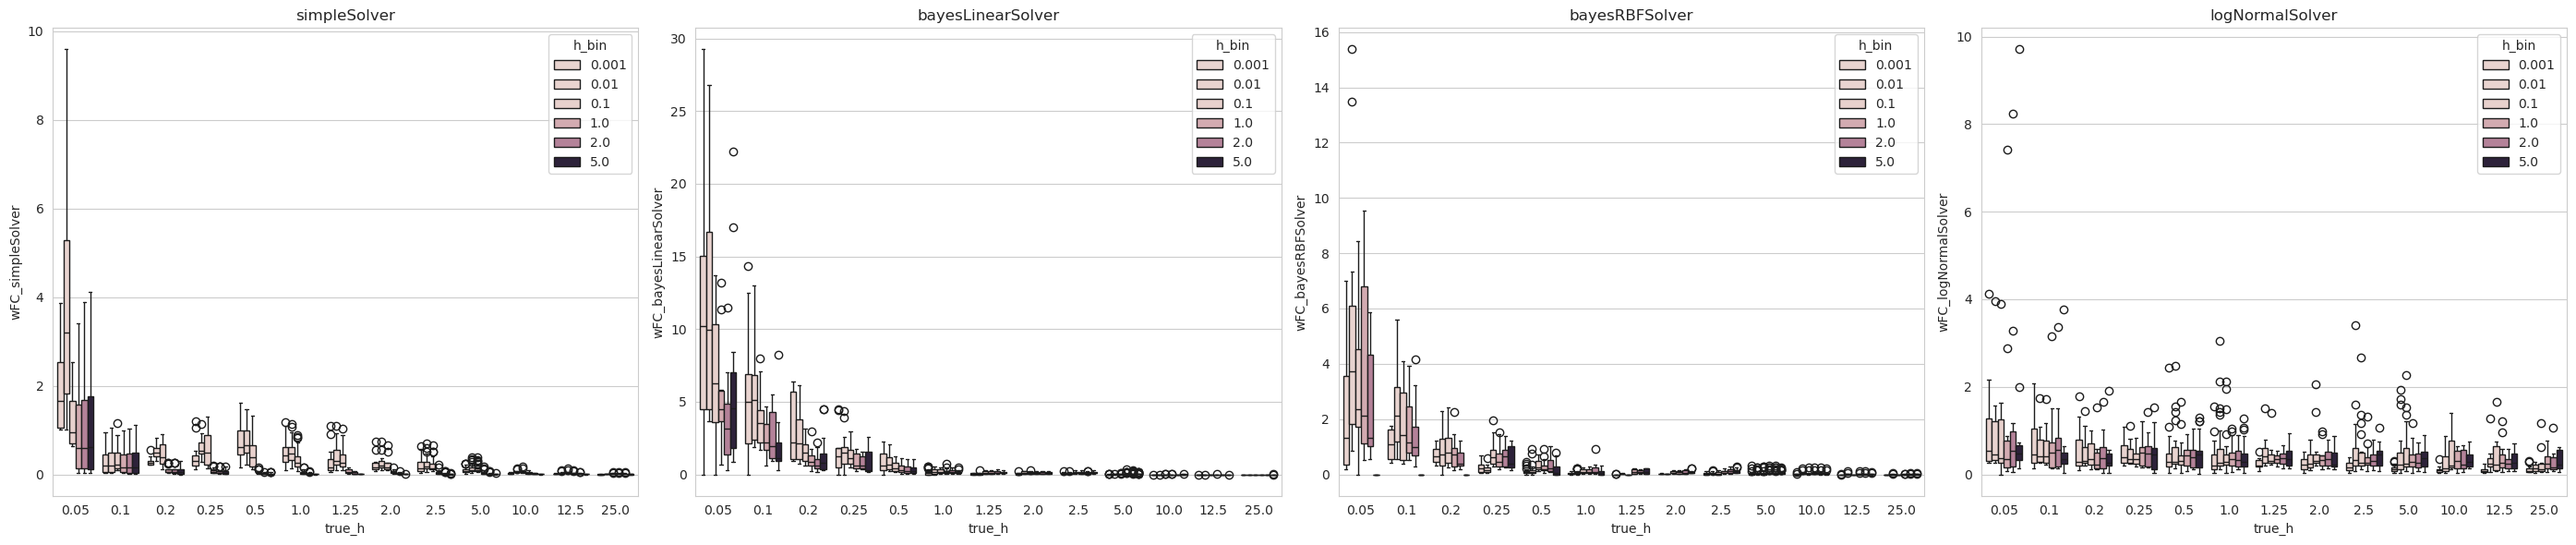

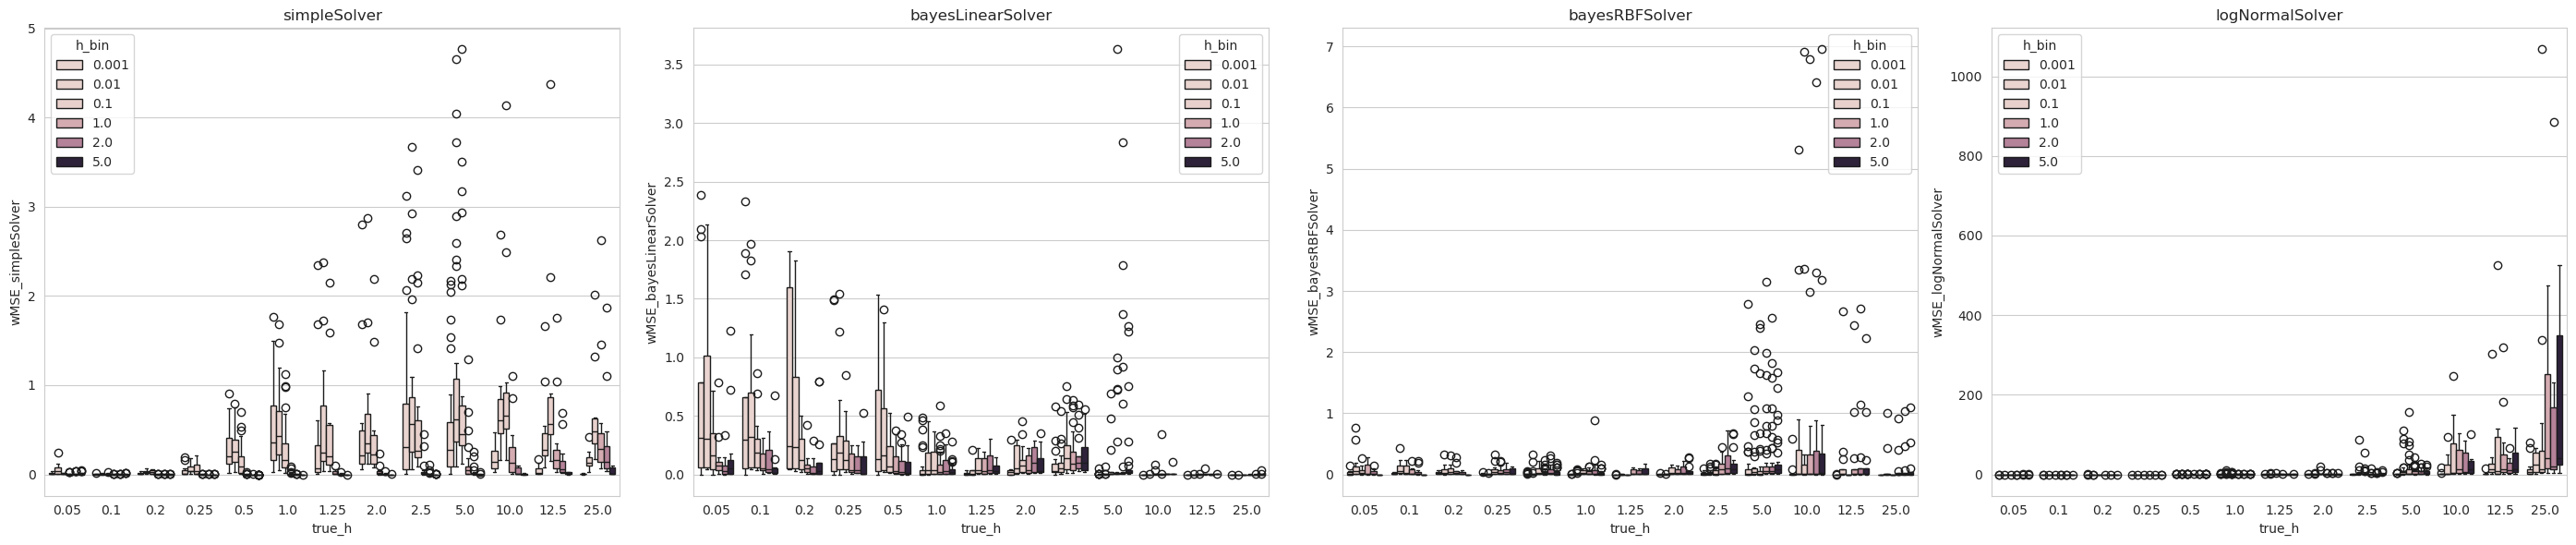

In [7]:
importlib.reload(plot)
plot.plot1(result_df, metric='wFC', save_fn = os.path.join(output_folder, 'wFC.png'))
plot.plot1(result_df, metric='wMSE', save_fn = os.path.join(output_folder, 'wMSE.pdf'))

## plot2: For each ground truth values of elong_h, are there certain methods that do better than others?
- ax: true_h
- y_axis: wMSE
- hue: bins
- x_axis: solver
- plot_type: boxplot

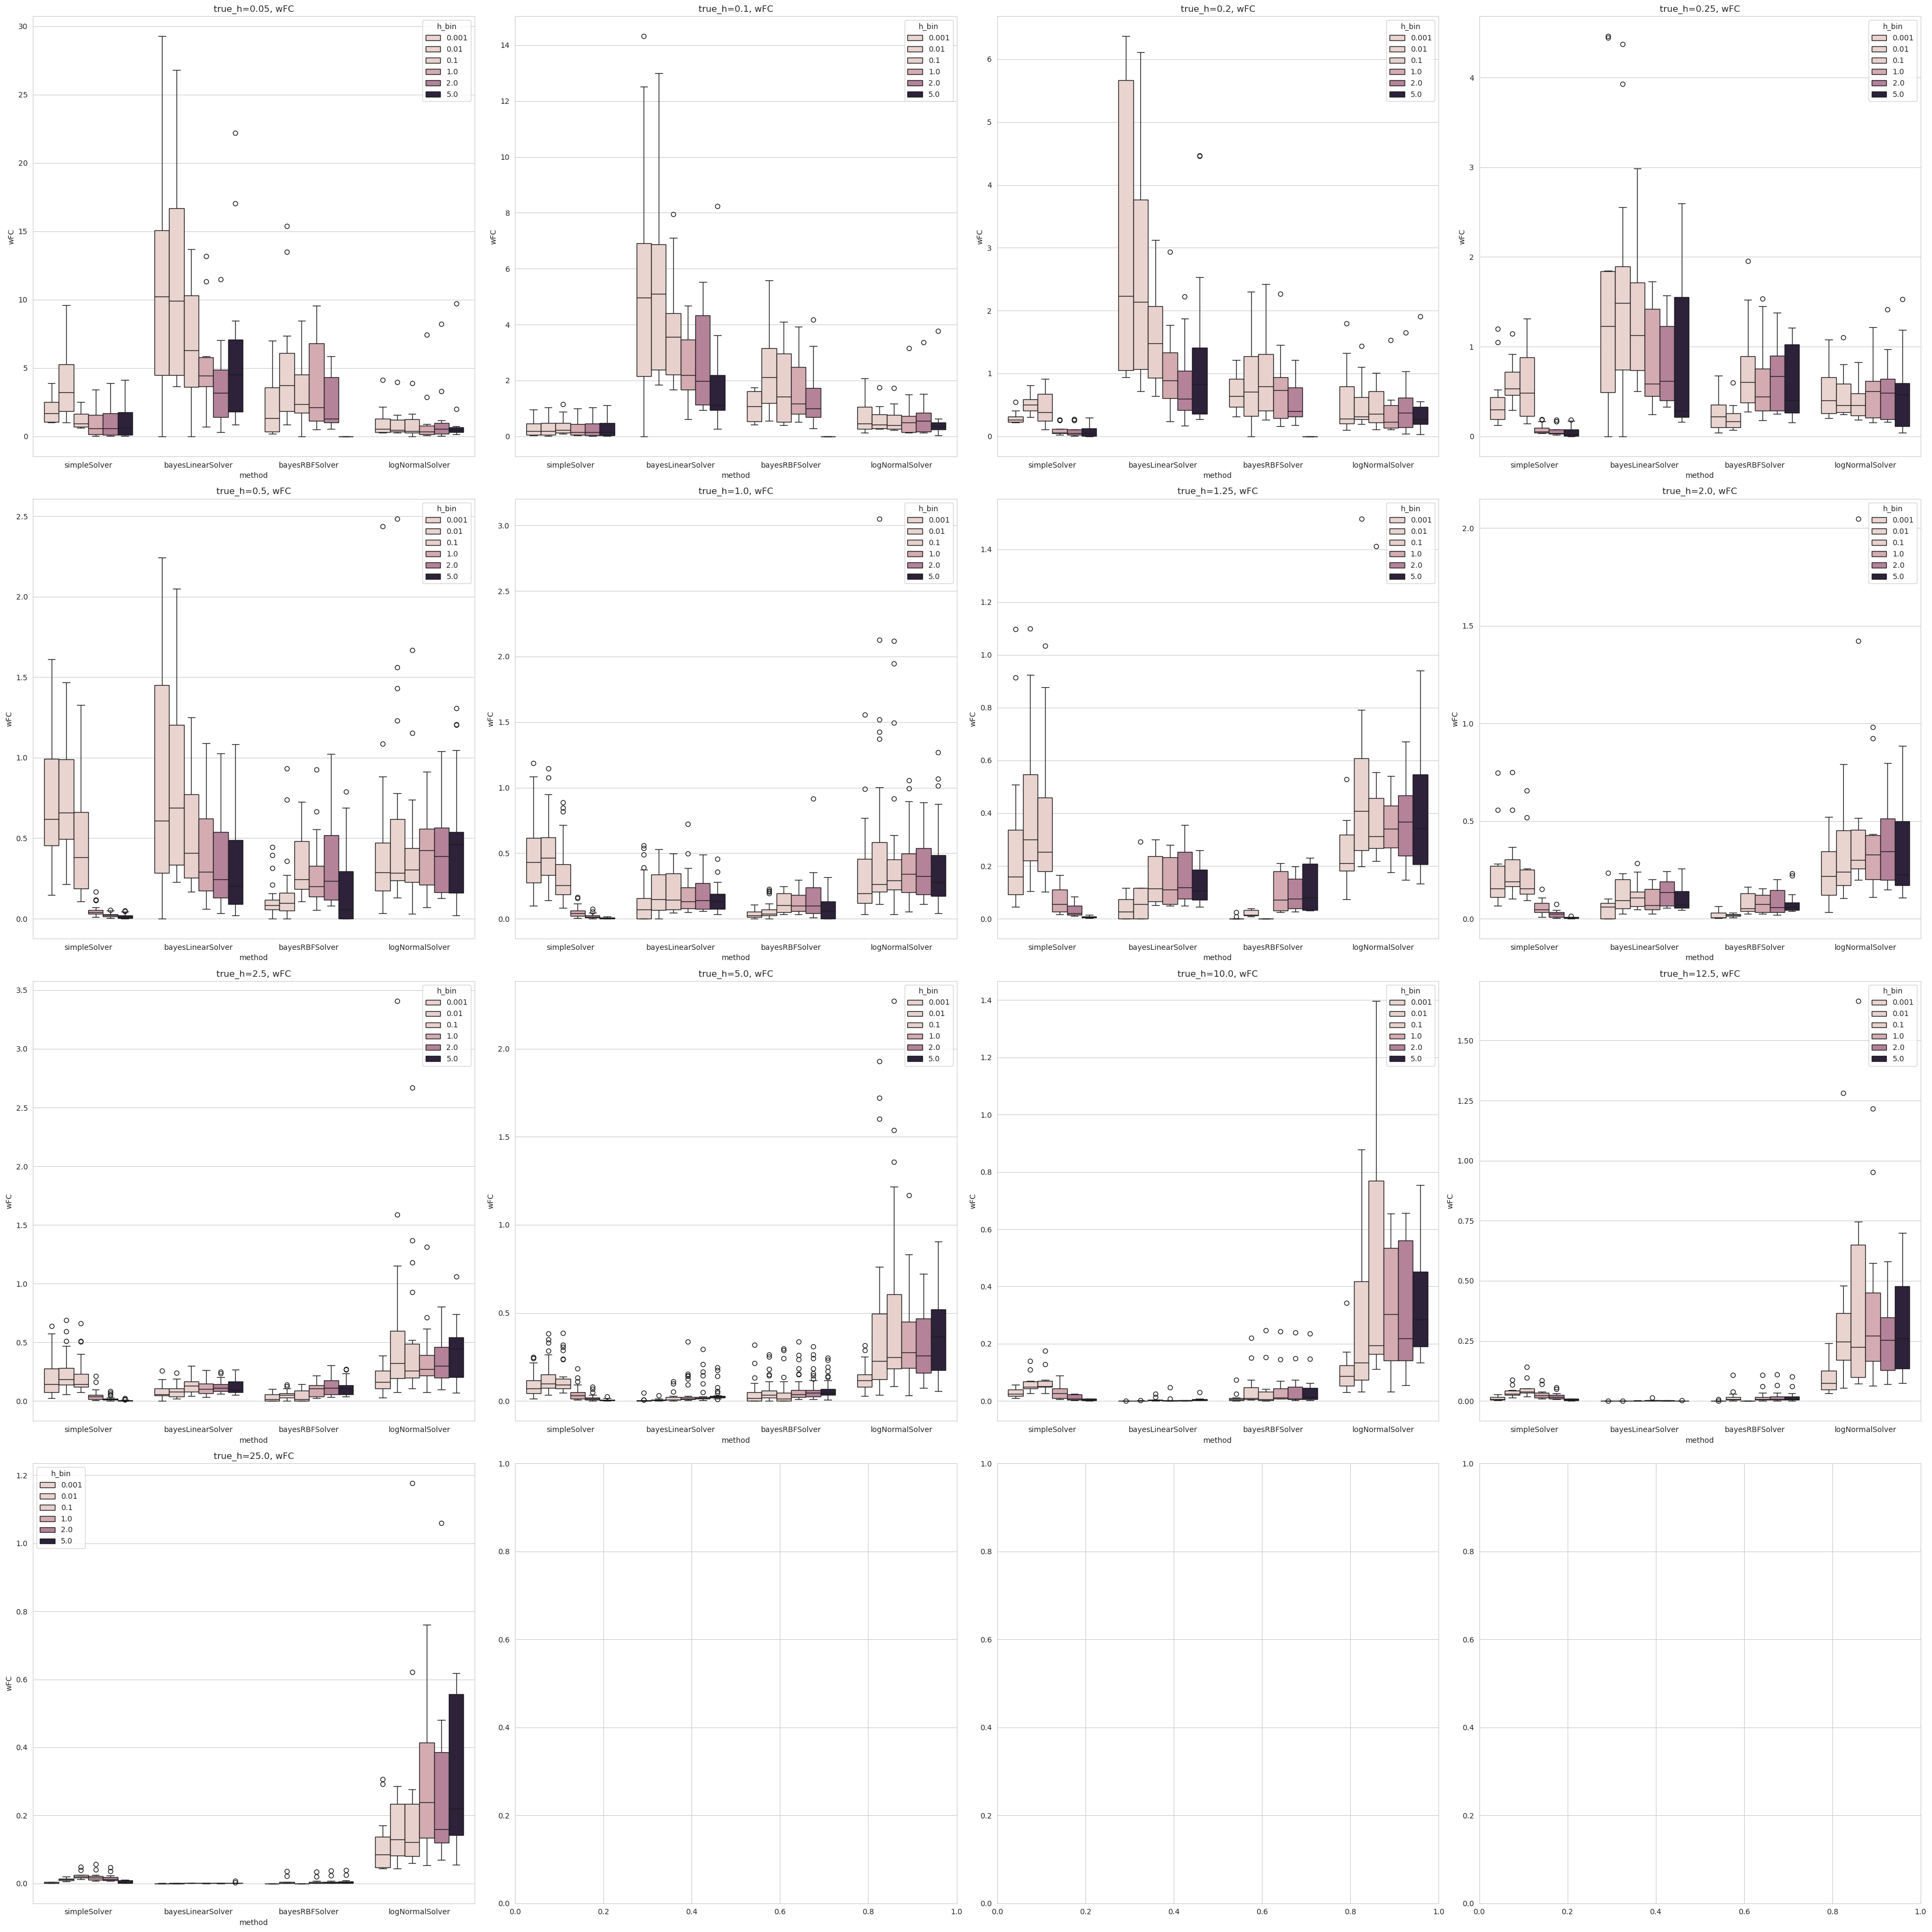

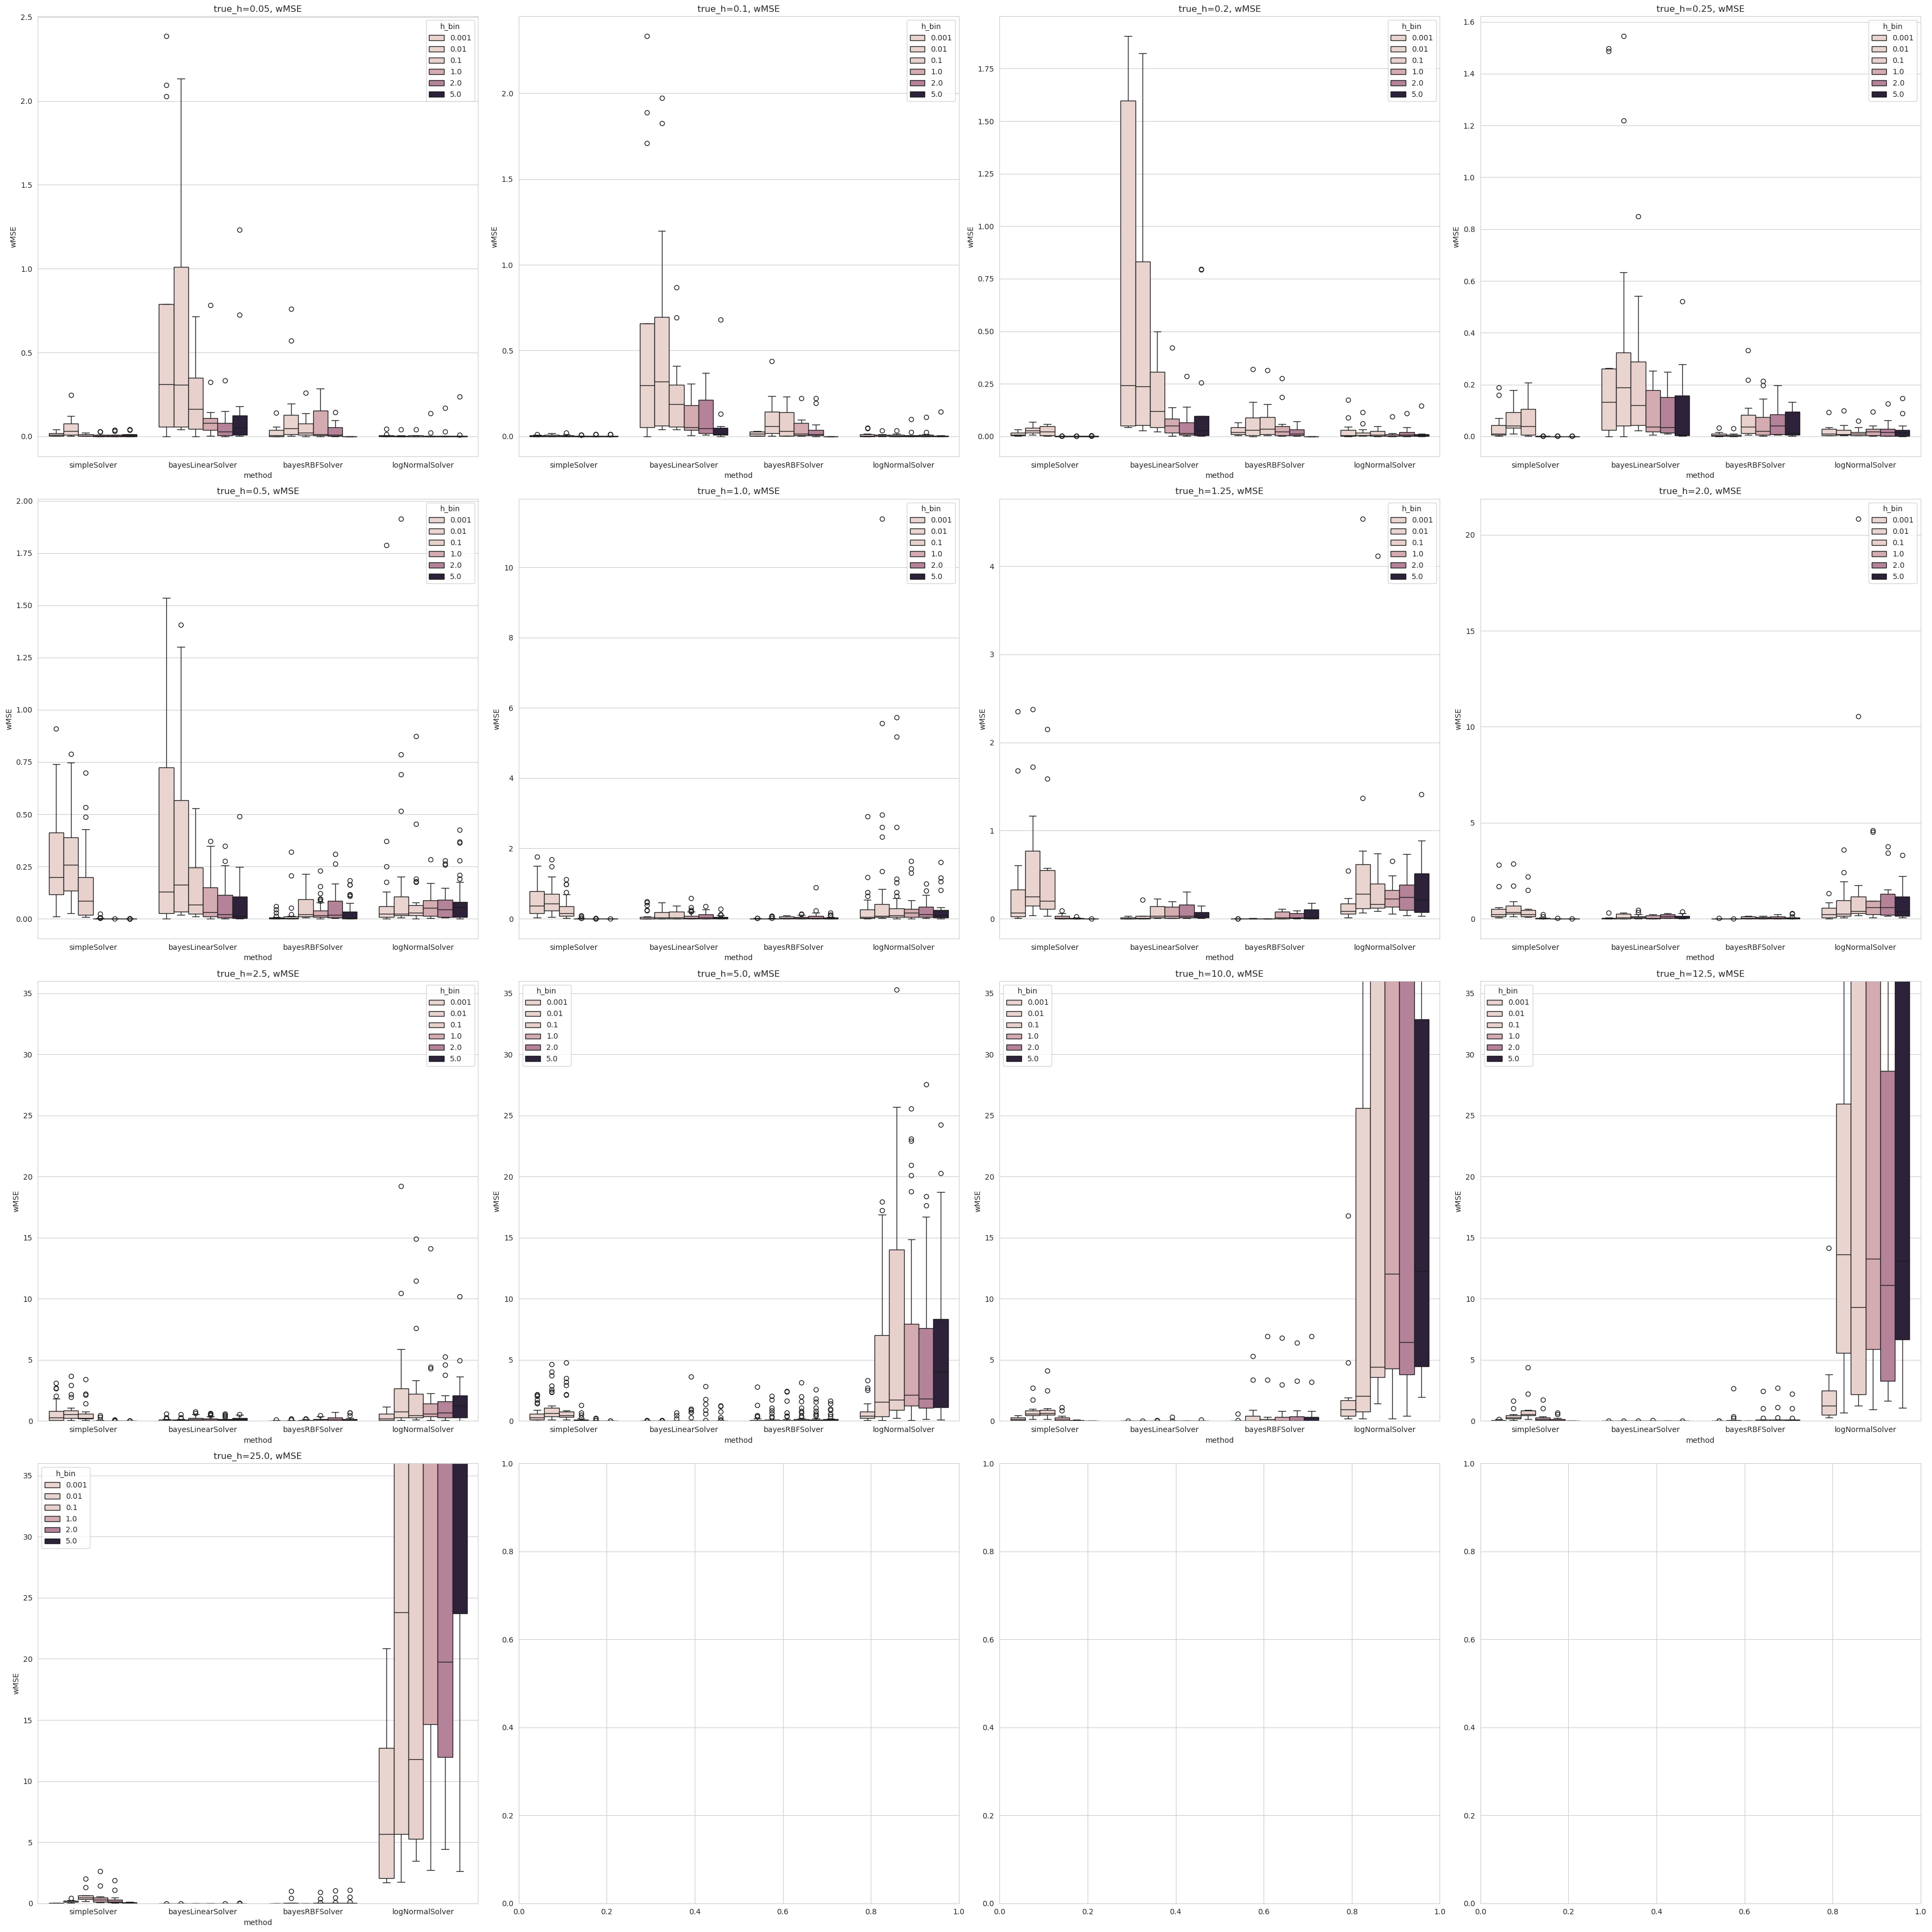

In [10]:
importlib.reload(plot)
plot.plot2(result_df, metric='wFC', save_fn = os.path.join(output_folder, 'wFC_by_trueH.png'))
plot.plot2(result_df, metric='wMSE', save_fn = os.path.join(output_folder, 'wMSE_by_trueH.png'))

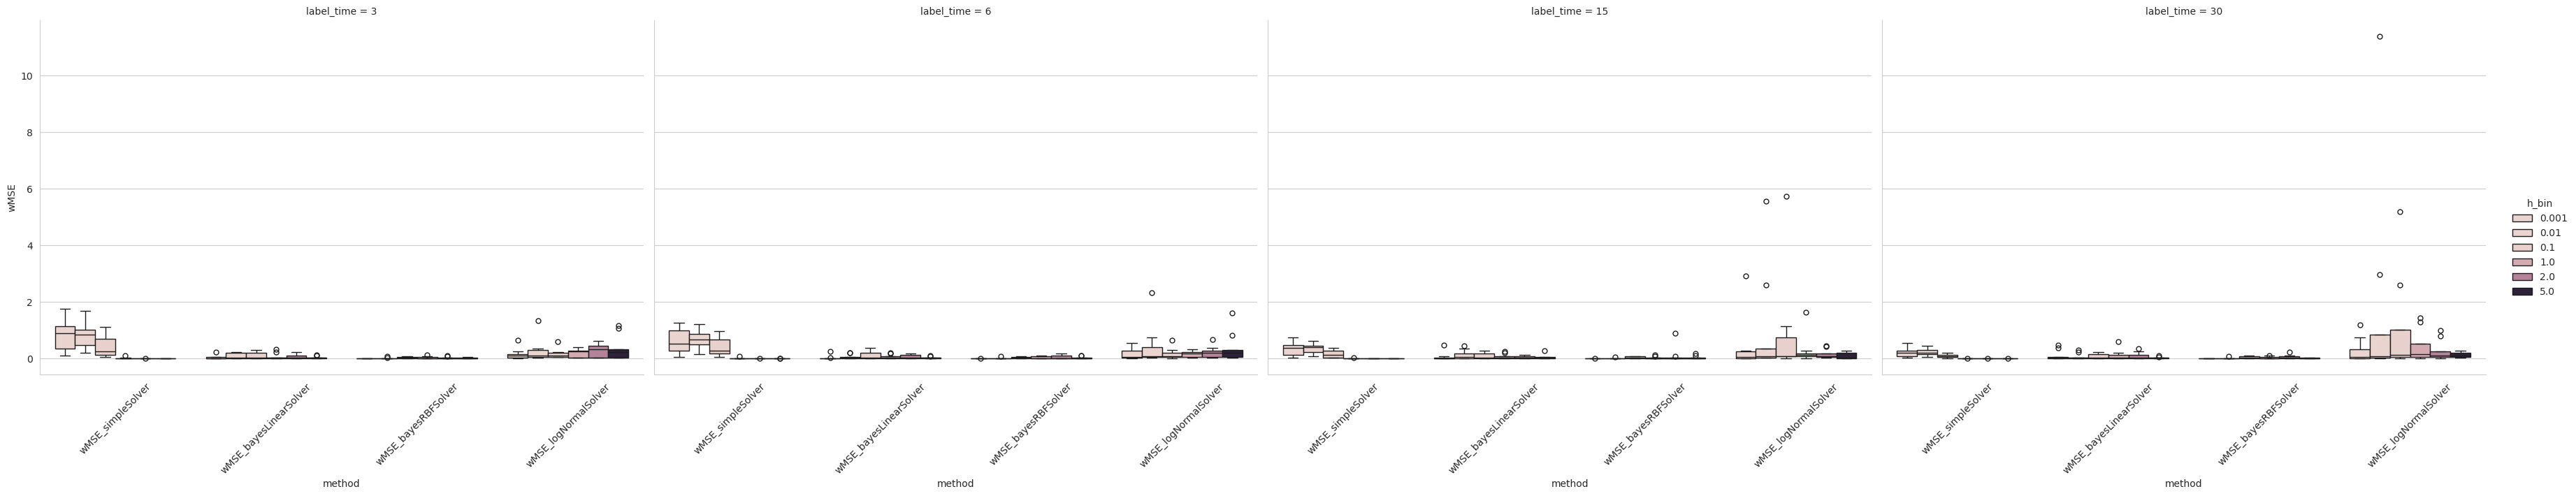

In [6]:
metric = 'wMSE'
true_h = 1
methods = ['simpleSolver', 'bayesLinearSolver', 'bayesRBFSolver', 'logNormalSolver']
result_df['true_h'] = result_df['G']/result_df['time_traverse_gene']
plot_df = result_df[result_df['true_h'] == true_h]
df = plot_df.melt(id_vars=['h_bin', 'label_time'], value_vars = [f'{metric}_{method}' for method in methods], var_name='method', value_name='wMSE')
# Specify desired figure dimensions in inches
fig_width = 9  # Width of the figure
fig_height = 6  # Height of the figure
# Calculate aspect ratio for sns.catplot
# For sns.catplot without facets, total figure width = height * aspect
aspect = fig_width / fig_height
# Create the catplot
g = sns.catplot(
    x='method',
    y='wMSE',
    hue='h_bin',
    col='label_time',
    data=df,
    kind='box',
    height=fig_height,
    aspect=aspect,
)
# Rotate x-axis labels
g.set_xticklabels(rotation=45)
plt.show()


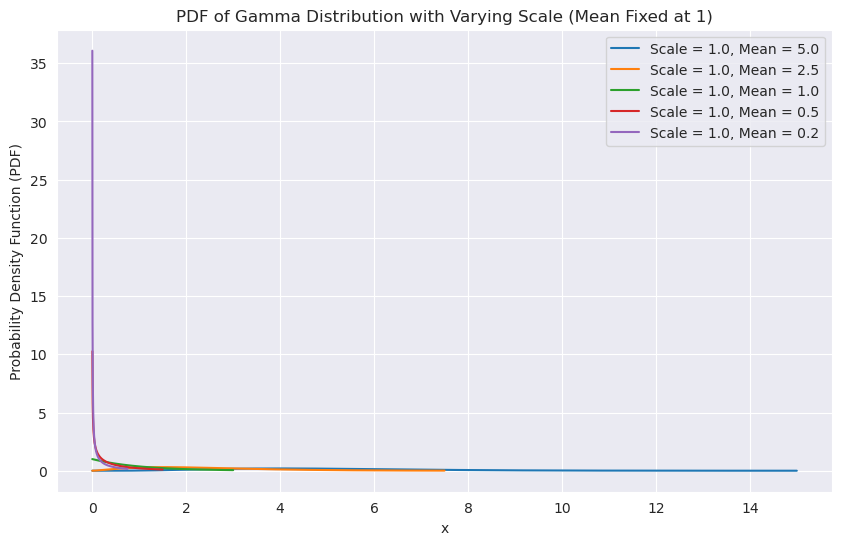

In [16]:
# for a particular case of a gene, plot the ground truth and predicted elongation rates and obeserve the stability of the different methodimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
# Define the range of scale values to vary
scales = np.linspace(0.5, 2, 5)

# Define the range of x-values for plotting
means = [5, 2.5, 1, 0.5, 0.25]


# Plot the PDF of the Gamma distribution for each scale
plt.figure(figsize=(10, 6))

for mean in means:
    x = np.linspace(0, mean*3, 500)
    scale=1
    # For each scale, calculate the Gamma PDF with mean fixed at 1
    shape = mean/ scale
    pdf = gamma.pdf(x, a=shape, scale=scale)
    plt.plot(x, pdf, label=f'Scale = {scale:.1f}, Mean = {shape * scale:.1f}')

plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Gamma Distribution with Varying Scale (Mean Fixed at 1)')
plt.legend()
plt.grid(True)
plt.show()

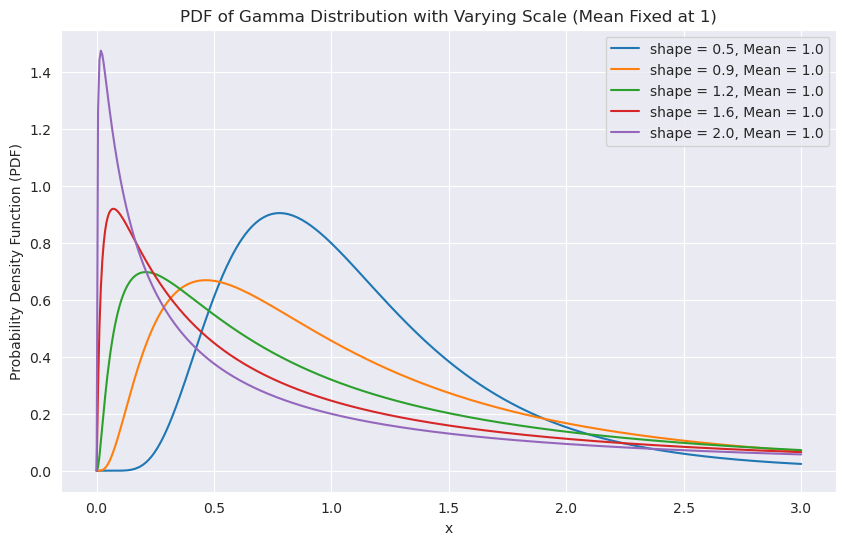

In [11]:
# for a particular case of a gene, plot the ground truth and predicted elongation rates and obeserve the stability of the different methodimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm
import numpy as np
# Define the range of scale values to vary
shapes = np.linspace(0.5, 2, 5)

# Define the range of x-values for plotting
mean = 1
x = np.linspace(0, mean*3, 500)

# Plot the PDF of the Gamma distribution for each scale
plt.figure(figsize=(10, 6))

for shape in shapes:
    pdf = lognorm.pdf(x, s = shape, scale=mean)
    plt.plot(x, pdf, label=f'shape = {shape:.1f}, Mean = {mean:.1f}')

plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Gamma Distribution with Varying Scale (Mean Fixed at 1)')
plt.legend()
plt.grid(True)
plt.show()

     start   end  true_h  simpleSmooth  simpleSolver
0      0.0   0.1     7.5      4.986633      4.938251
1      0.1   0.2     7.5      4.987264      4.928617
2      0.2   0.3     7.5      4.985438      4.781740
3      0.3   0.4     7.5      4.979743      4.835070
4      0.4   0.5     7.5      4.970220      4.913209
..     ...   ...     ...           ...           ...
145   14.5  14.6     7.5      4.999018      4.997548
146   14.6  14.7     7.5      4.998597      4.997388
147   14.7  14.8     7.5      4.997806      4.997335
148   14.8  14.9     7.5      4.999981      4.997438
149   14.9  15.0     7.5      6.900138      6.923659

[150 rows x 5 columns]
     start        method    pred_h
0      0.0  simpleSolver  4.938251
1      0.1  simpleSolver  4.928617
2      0.2  simpleSolver  4.781740
3      0.3  simpleSolver  4.835070
4      0.4  simpleSolver  4.913209
..     ...           ...       ...
295   14.5  simpleSmooth  4.999018
296   14.6  simpleSmooth  4.998597
297   14.7  simpleSmooth 

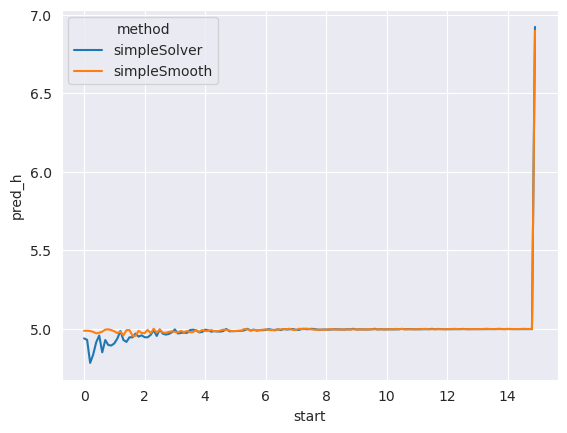

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
input_fn = 'trial.txt.gz'
df = pd.read_csv(input_fn, sep='\t', header = 0, index_col=None)
# draw lineplots: x= start, y= methods, hue = methods
print(df)
plot_df = df.melt(id_vars=['start'], value_vars = ['simpleSolver', 'simpleSmooth'], var_name='method', value_name='pred_h') # , 'bayesLinearSolver', 'bayesRBFSolver', 'logNormalSolver'
print(plot_df)
sns.lineplot(x='start', y='pred_h', hue='method', data=plot_df)
plt.show()